#Assignment 8:
#Boyeong Hong
* This assignment used the data from my GRA project (E-waste).
* The main topic is to understand an accessibility to e-waste collection facilities from each borough of NYC.

In [1]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
#import seaborn as sns
from statsmodels.graphics.api import abline_plot
from pandas.tools.plotting import scatter_matrix
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = gp.GeoDataFrame.from_file("accessibility_collection_site_ct_pop.shp")

In [3]:
print df.columns

Index([u'BoroCT2010',   u'BoroCode',   u'BoroName',    u'Borough',
       u'Boroughcod', u'CDEligibil',         u'CT',     u'CT2010',
          u'CTLabel',    u'CT_long',         u'F8',       u'FIPS',
        u'NEAR_DIST',   u'NEAR_FID',    u'NTACode',    u'NTAName',
             u'PUMA', u'Population', u'Shape_Area', u'Shape_Leng',
             u'Year',       u'code',   u'geometry',          u'x',
                u'y'],
      dtype='object')


In [4]:
df['NEAR_DIST'].describe()

count     2166.000000
mean      3611.544021
std       3849.697976
min          0.000000
25%       1156.592673
50%       2672.859013
75%       4736.441196
max      31049.991523
Name: NEAR_DIST, dtype: float64

In [5]:
df_MN=df[df.BoroName=='Manhattan']
df_BR=df[df.BoroName=='Brooklyn']
df_QN=df[df.BoroName=='Queens']
df_BX=df[df.BoroName=='Bronx']
df_ST=df[df.BoroName=='Staten Island']

### Box plots (original nearest distance)

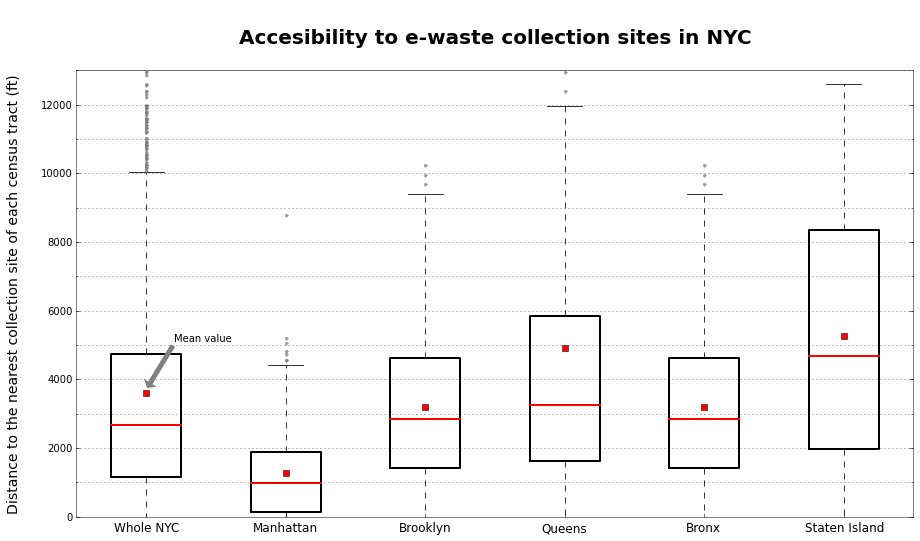

In [58]:
data_to_plot = [df['NEAR_DIST'], df_MN['NEAR_DIST'],df_BR['NEAR_DIST'],df_QN['NEAR_DIST'],df_BR['NEAR_DIST'],df_ST['NEAR_DIST']]

# Create a figure instance
fig = plt.figure(1, figsize=(15, 8))

# Create an axes instance
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('Gray')
ax.spines['top'].set_color('Gray') 
ax.spines['right'].set_color('Gray')
ax.spines['left'].set_color('Gray')

ax.set_title("\nAccesibility to e-waste collection sites in NYC\n", fontsize=20, fontweight='bold')
ax.set_ylim(0,13000)
#ax.set_xlabel("1=NYC, 2=Manhattan, 3=Brooklyn, 4=Queens, 5=Bronx, 6=Staten Island")

ax.set_ylabel("Distance to the nearest collection site of each census tract (ft)\n", fontsize=14)

ax.get_xaxis().tick_bottom()
ax.yaxis.set_minor_locator(MultipleLocator(1000))
ax.yaxis.grid(True,'minor')

# Create the boxplot
bp = ax.boxplot(data_to_plot, showmeans=True)
ax.set_xticklabels(['Whole NYC', 'Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], fontsize=12)

for box in bp['boxes']:
    # change outline color
    box.set(color='Black', linewidth=2)
    
for whisker in bp['whiskers']:
    whisker.set(color='Black', linewidth=0.8)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='Black', linewidth=0.8)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='Red', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='.', color='Gray', alpha=0.8)
    
ax.annotate('Mean value', xy=(1, 3700), xytext=(1.2,5100),
            arrowprops=dict(color='Gray', shrink=0.05))